In [31]:
using LinearAlgebra;
using StaticArrays;
using Makie
using CairoMakie
using Printf


In [32]:
"""
    H(k, M) -> Matrix{Complex{Float64}}
    Hamiltonian for the SSH Model 
"""
@inline function H(k::Float64, M::Float64)
    fk = 1.0 + exp(im * k); fkc = conj(fk);
    [M fk; fkc -M]
end

@inline function evals(k::Float64, M::Float64)
    fk = 1.0 + exp(im * k); fkc = conj(fk);
    eigvals([M fk; fkc -M])
end

@inline function eigensystem_SSH(k::Float64, M::Float64)
    fk = 1.0 + exp(im * k); fkc = conj(fk);
    eigen(Hermitian([M fk; fkc -M]))
end

"""
    plot_band_structure(M::Float64)
    Plot the band structure of the SSH model
"""

function plot_bands_SSH(;M::Float64)
    ks = range(-π, π, length = 100)
    E = evals.(ks, Ref(M))
    valence = map(x -> x[1], E)
    conduct = map(x -> x[2], E)
    f = Figure()
    ax = Axis(f[1, 1], title="SSH Chain Bands, M = $M")
    lines!(ax, ks, valence, color = :blue, linewidth = 2)
    lines!(ax, ks, conduct, color = :blue, linewidth = 2)
    f
    #scatter(ks, valence, color=:blue, linewidth=2)
end

plot_bands_SSH (generic function with 2 methods)

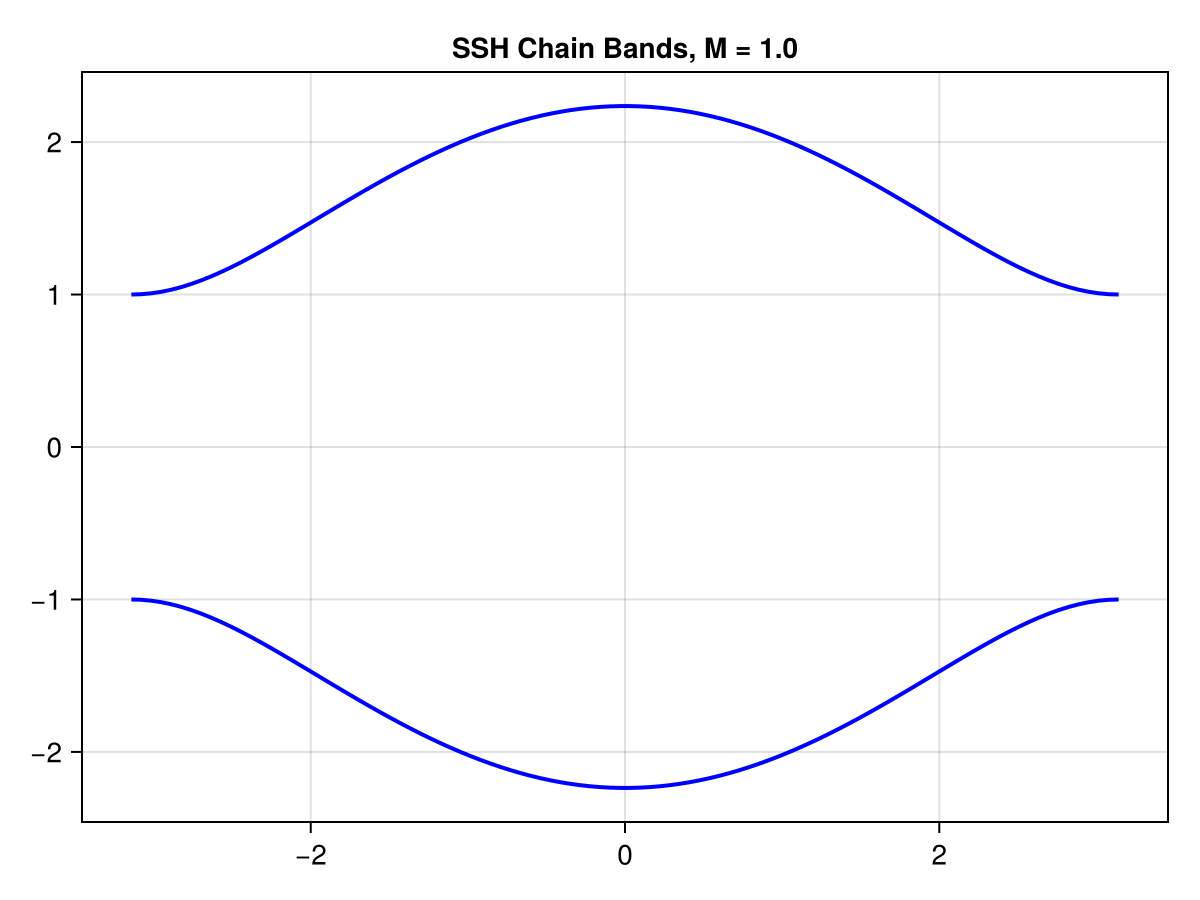

In [33]:
plot_bands_SSH(M = 1.0)

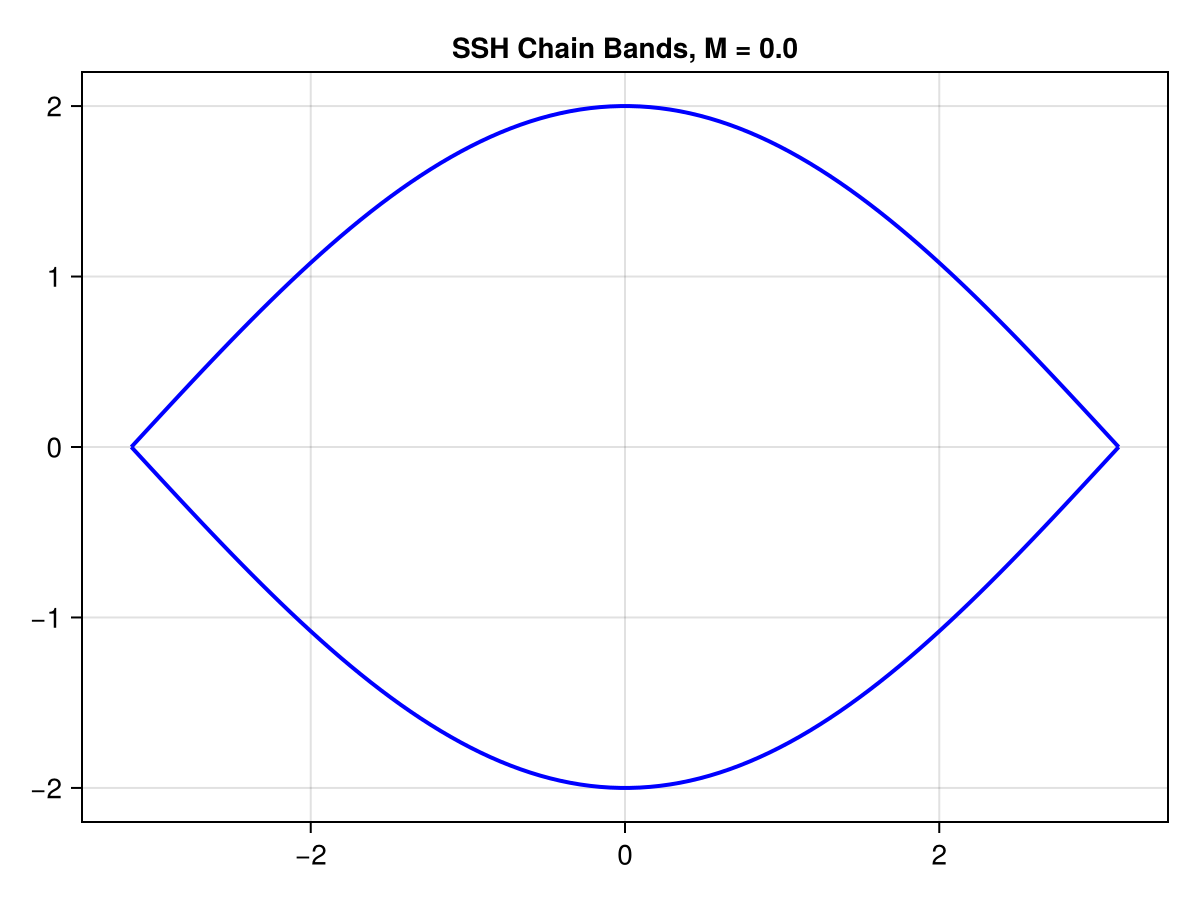

In [34]:
plot_bands_SSH(M = 0.0)

## Now, we calculate the loop integral of the Berry connection ##
### Start with the overlaps \Lambda i.e. Form factors ### 